In [36]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import input_data


%matplotlib inline



In [4]:
mnist = input_data.read_data_sets(train_dir='.')

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting .\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting .\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting .\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting .\t10k-labels-idx1-ubyte.gz


In [9]:
mnist.train.images[0].shape

(784,)

In [129]:
def plot_single_number(image_array):
    """
    image_array is the array that represents a
    single mnist image. it has shape (784, )
    and needs to be reshaped.
    """
    X = image_array
    X = X.reshape([28, 28]);
    plt.figure(figsize=(2, 2))
    plt.gray()
    plt.axis('off')
    plt.imshow(X)
    plt.show()

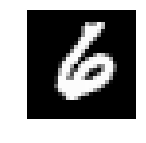

In [130]:
plot_single_number(mnist.train.images[99])

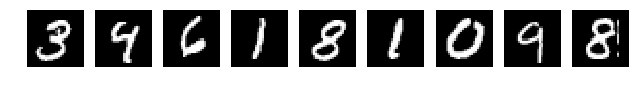

In [56]:
fig = plt.figure(figsize=(12,12))

for i in range(1, 10):
    ax = fig.add_subplot(1, 10, i)
    X = mnist.train.images[i]
    X = X.reshape([28, 28])
    ax.axis('off')
    ax.imshow(X)


In [58]:
mnist.train.labels[1:10]

array([3, 4, 6, 1, 8, 1, 0, 9, 8], dtype=uint8)

In [64]:
print(np.max(mnist.train.images[0]))
print(np.min(mnist.train.images[0]))


0.9960785
0.0


In [112]:
def one_hot_encode_numbers(labels):
    
    if isinstance(labels, np.uint8):
        num_labels = 1
        labels = [labels]
    else:
        num_labels = labels.shape[0]
        
    one_hots = np.zeros(shape=(num_labels, 10))
    
    for i in range(num_labels):
        one_hots[i, labels[i]]=1

    return one_hots

In [118]:
abc = mnist.train.labels[1100:1109]
print(abc)
one_hot_encode_numbers(abc)

[9 4 6 0 1 2 3 4 1]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [189]:
mnist.train.images[0:3][0].reshape(28, 28).shape
# [i for i in 1]

(28, 28)

In [206]:
def reshape_images(images):
    """
    images is a np array of n images
    each with size (784,) that need
    to be reshaped
    """
    # if it doesn't have a second dimension, it's a single image
    try:
        images.shape[1]
    except:
        return images.reshape(28, 28)
    
    reshaped = np.stack([images[i].reshape(28, 28) for i in range(images.shape[0])])

    return reshaped
    
reshape_images(mnist.train.images[0:3]).shape


(3, 28, 28)

In [165]:
print("number of training examples = " + str(mnist.train.images.shape[0]))
print("number of validation examples = " + str(mnist.validation.images.shape[0]))
print("number of test examples = " + str(mnist.test.images.shape[0]))
print("Input images are of size = " + str(mnist.train.images[0].reshape(28,28).shape))

number of training examples = 55000
number of validation examples = 5000
number of test examples = 10000
Input images are of size = (28, 28)


In [223]:
aaa = np.random.normal(scale=0.01, size=(3,3))
print(aaa)
def relu(num):
    return np.max([num,0])
relu_layer = np.vectorize(relu)

#test
relu_layer(aaa)

[[ 0.00277795 -0.00047347 -0.00941613]
 [ 0.00366754  0.00153648 -0.00412454]
 [-0.0061554  -0.00078805  0.00019837]]


array([[0.00277795, 0.        , 0.        ],
       [0.00366754, 0.00153648, 0.        ],
       [0.        , 0.        , 0.00019837]])

In [224]:
aaa = np.random.normal(scale=0.01, size=(3,3))
print(aaa)

def max_pool(grid):
    return np.max(grid)

# test
max_pool(aaa)

[[-0.02285293 -0.00717831  0.00523548]
 [ 0.01581124  0.00822494  0.00711687]
 [ 0.0024365   0.01192195 -0.00652337]]


0.01581124276079739

In [233]:
class conv_net(object):
    """
    class for a convolutional neural network.
    
    layers:
    input layer 
                - the image, size (28, 28)
    conv layer 
                - weights W1 
                - padding 'VALID', stride 2
                - size(4, 4)
                - output size (16, 16)
    relu layer 
                - output size (16, 16)
    max_pool
                - padding 'VALID', stride 2
                - size (4, 4)
                - output will be (8, 8)
    conv layer 
                - weights W2 
                - padding 'VALID', stride 2
                - size(2, 2)
                - output size (4, 4)
    relu layer
                - output size (4, 4)
    max_pool
                - padding 'VALID', stride 2
                - size (2, 2)
                - output size (2, 2)
    reshape layer
                - reshape to size (4,)
    fully connected layer
                - weights W3
                - size (40)
                - output size (10,)

    """
    def __init__(self, seed):
        self.seed = seed
    
    def set_seed(self):
        np.random.seed(self.seed)
    
    def initialise_weights(self):
        self.W1 = np.random.normal(scale=0.01, size=(4,4))
        self.W2 = np.random.normal(scale=0.01, size=(2,2))
        self.W3 = np.random.normal(scale=0.01, size=(40,))
    
    def forward_pass(image):
        

In [239]:
qq = conv_net(101)
qq.set_seed()
qq.initialise_weights()
qq.W1

array([[ 0.0270685 ,  0.00628133,  0.00907969],
       [ 0.00503826,  0.00651118, -0.00319318],
       [-0.00848077,  0.00605965, -0.02018168]])

In [ ]:
# create network
np.random.seed(10)
# structure will be
#
# CONV2D: stride of 1, padding 'SAME' (padding of 1 around)
# so output will be (28, 28)
Z1 = np.random.normal(scale=0.01, size=(3,3))
# RELU 
# applies max(num, 0) to each element, output (28, 28)
# apply to Z1
A1 = relu_layer(Z1)
# MAXPOOL: window 4x4, sride 4, padding 'SAME', (2 around)
# out_height = ceil(float(in_height) / float(strides[1]))
# out_width = ceil(float(in_width) / float(strides[2]))
# so output will be (7, 7)
P1 = max_pool(A1)
# CONV2D: filters W2, stride 1, padding 'SAME'
# grid of 3 by 3, padding of 1 around, output will be (7, 7)
Z2 = np.random.normal(scale=0.01, size=(3,3))
# RELU, again output will be (7, 7)
A2 = relu_layer(Z2)
# MAXPOOL: window 3x3, stride 2, padding 'SAME' (padding of 1)
# output size (4, 4)
P2 = None
# FLATTEN
# reshape into 1 dimension
# output 16
P2 = None # np.random.normal(scale=0.01, size=(16,))
# FULLY-CONNECTED without non-linear activation function (not not call softmax).
# 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
Z3 = None
